<a href="https://colab.research.google.com/github/hilmikatirci/NLP_Image_Captioning_transformers/blob/main/NLP_Image_Captioning_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

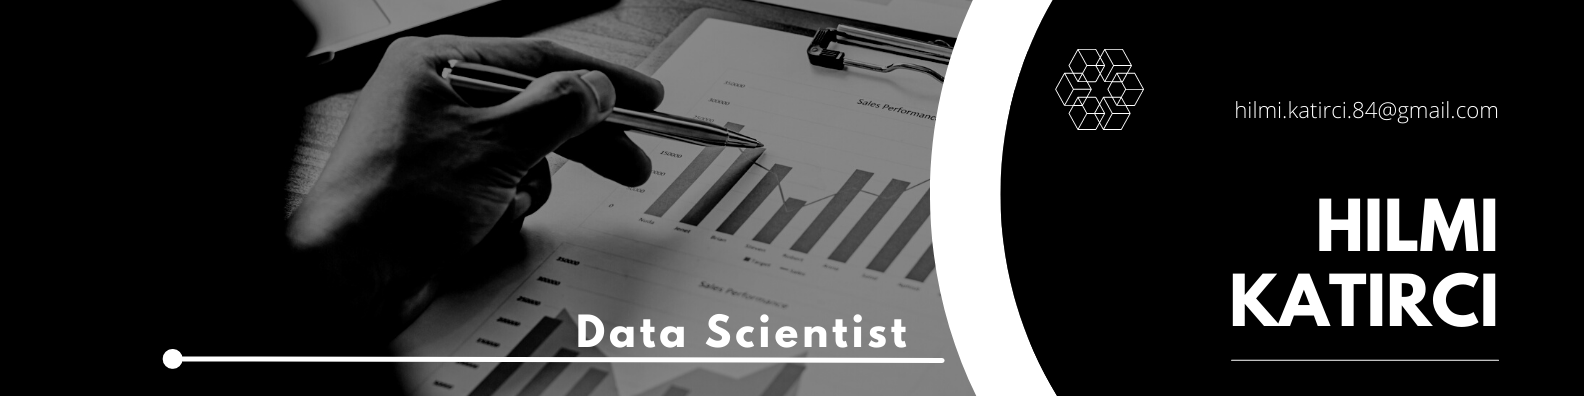

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 112.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.8 MB/s eta 0:00:00


In [2]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
from PIL import Image
import torch

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 25
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

Downloading:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/982M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Downloading:   0%|          | 0.00/241 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/120 [00:00<?, ?B/s]

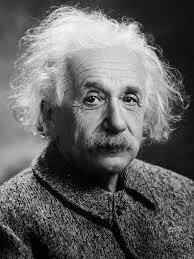

In [4]:
from PIL import Image
im = Image.open('/content/Einstein.jpg')
display(im);

In [6]:
predict_step(["/content/Einstein.jpg"])

['a man in a suit and tie posing for a picture']

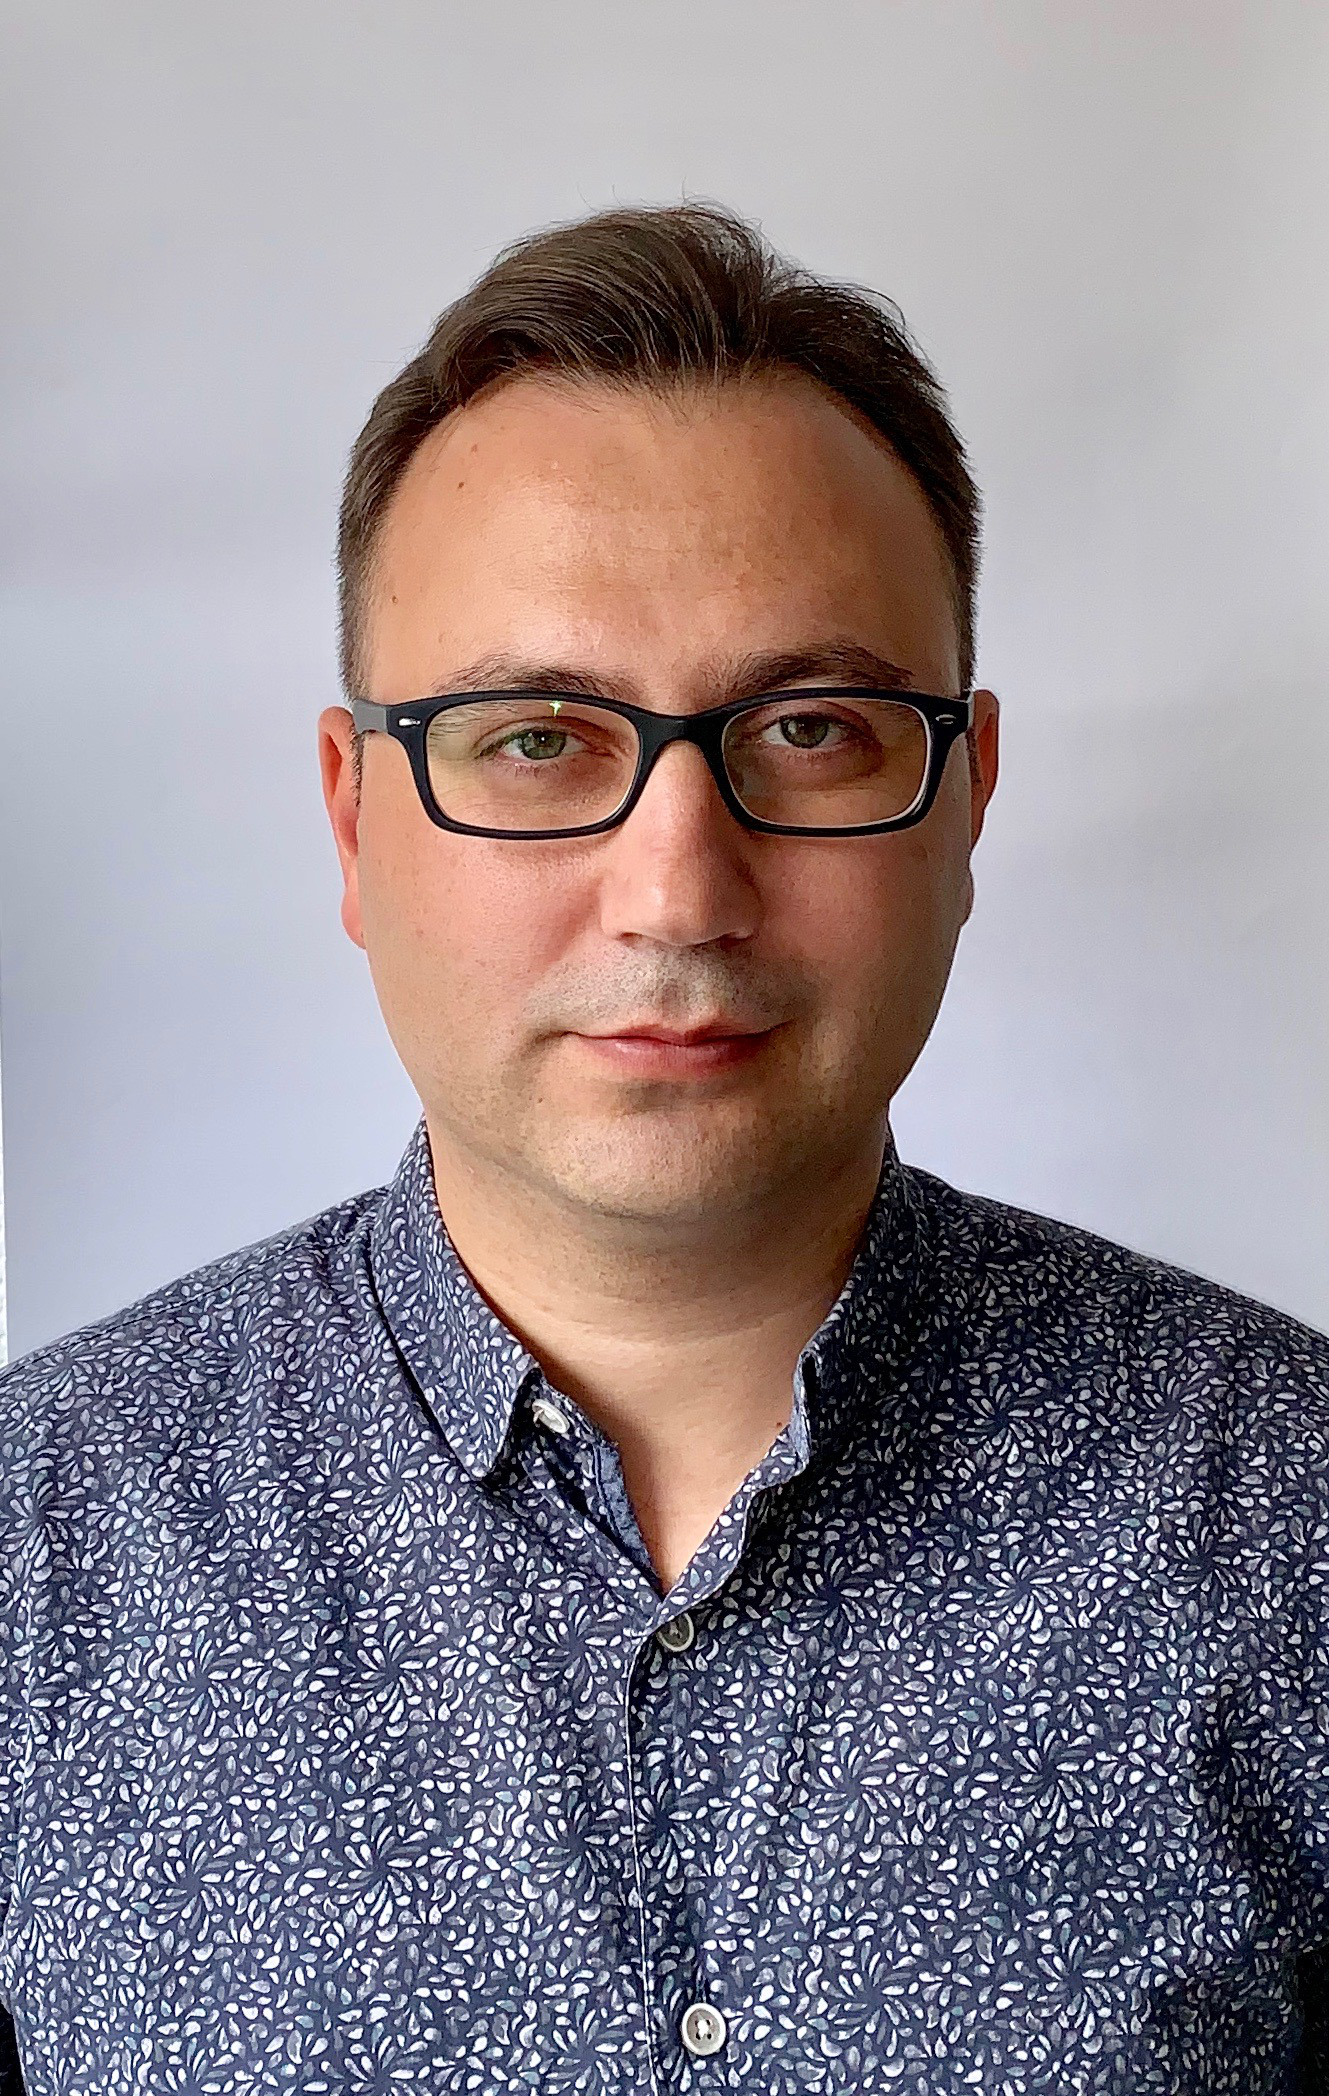

In [12]:
from PIL import Image
im = Image.open('/content/hk.JPG')
display(im);

In [13]:
predict_step(['/content/hk.JPG'])

['a man wearing glasses and a tie']

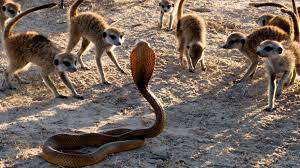

In [9]:
im = Image.open('/content/sneak.jpg')
display(im);

In [11]:
predict_step(["/content/sneak.jpg"])

['a herd of animals standing on top of a dirt field']

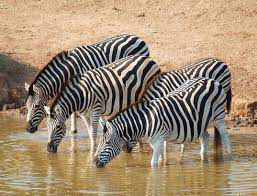

In [ ]:
im = Image.open('/content/drive/MyDrive/pictures/zebra.jpg')
display(im);

In [ ]:
predict_step(["/content/drive/MyDrive/pictures/zebra.jpg"])

['a herd of zebras drinking water from a pond']

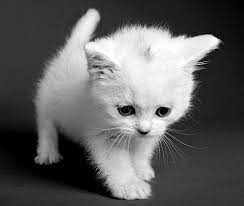

In [ ]:
im = Image.open('/content/drive/MyDrive/pictures/cat.jpg')
display(im);

In [ ]:
predict_step(["/content/drive/MyDrive/pictures/cat.jpg"])

['a white kitten sitting on top of a white surface']

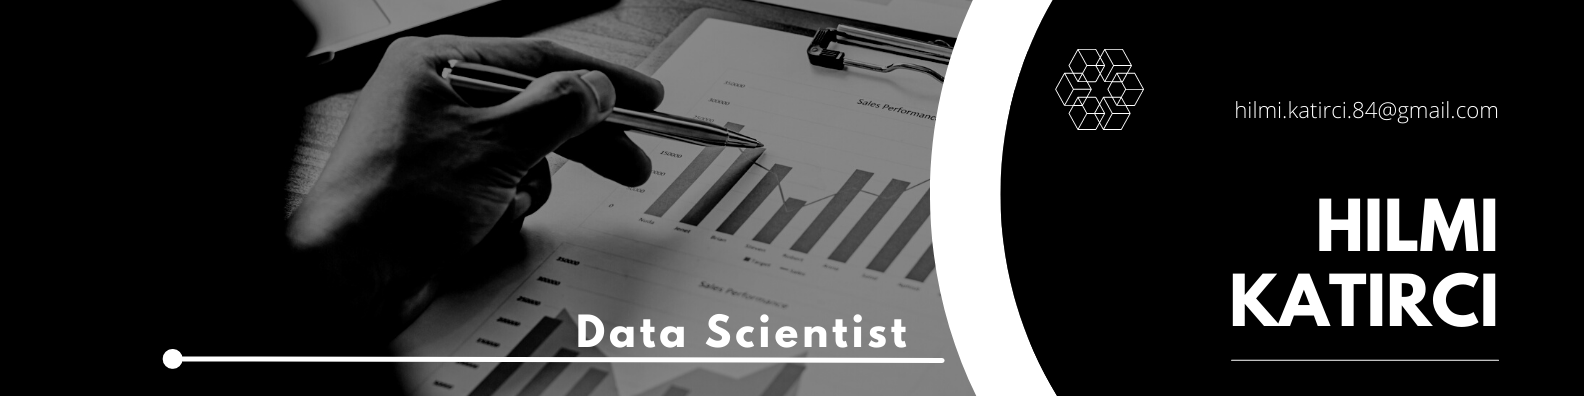